description of variables in titanic dataset 
https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

# Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd 
import numpy as np

# visualization 
import seaborn as sns  
import matplotlib.pyplot as plt

import os
print(os.getcwd())  



c:\Users\kklr\Documents\Python\Projects\20230923_titanic_eda_classification


# Load data

In [2]:
# Load data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

# Descriptive statistics


## head and tail

In [3]:
# Take an initial look at the data
train_df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## datatypes

In [5]:
# data types 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## column names

In [6]:
# columns
train_df.columns 

for i in range(len(train_df.columns)):
    print(train_df.columns[i])

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## counts per column

In [8]:
# counts 
# how many entries for each column

train_df.count(), len(train_df)


(PassengerId    891
 Survived       891
 Pclass         891
 Name           891
 Sex            891
 Age            714
 SibSp          891
 Parch          891
 Ticket         891
 Fare           891
 Cabin          204
 Embarked       889
 dtype: int64,
 891)

## describe

In [9]:
# distribution of numerical features across samples
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# SibSp is siblings or parents. max = 8 siblings 

# lets take a look into this variable 

In [11]:
# correlation for SibSp on survival
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

# the more siblings the less chance of survival

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
sum(train_df['SibSp'] == 0) # 608 people has NOT either spouse or siblings
sum(train_df['SibSp'] != 0) # 283 people has either spouse or siblings

283

In [13]:
sib = sum(train_df['SibSp'] != 0) # passengers who had sibslings or spouse
sib/len(train_df) # rate of persons who had sibling or spouse 
# 31.7% 


0.3176206509539843

In [14]:
# distribution of categorical features

train_df.describe(include=['O'])

# What is the distribution of categorical features?

# Names are unique across the dataset (count=unique=891)
# Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
# Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
# Embarked takes three possible values. S port used by most passengers (top=S)
# Ticket feature has high ratio (22%) of duplicate values (unique=681).

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# NA's

sum(train_df["Age"].isna()) 

177

## NA's 

In [17]:
train_df.isnull().sum(axis= 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## survival rate among men/women

In [18]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [19]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men) 

% of men who survived: 0.18890814558058924


In [20]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Correlation matrix

## numerical features

correlation between numerical features

In [21]:
df_corr = train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] # keep only int and float columns
df_corr1 = pd.DataFrame(df_corr)

print(df_corr1.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

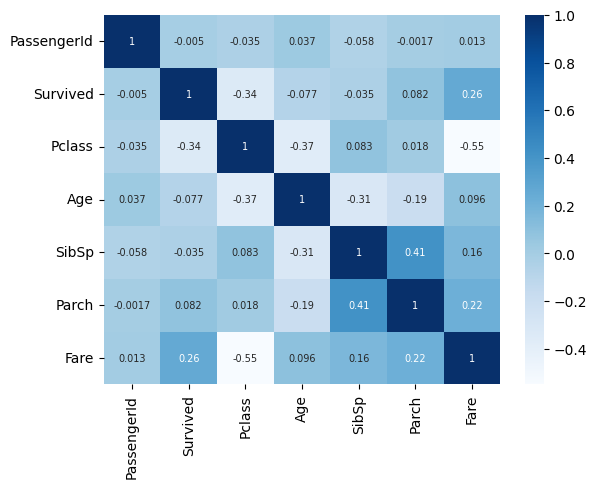

In [22]:
sns.heatmap(df_corr.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":7})

It's a bit surprising there isn't a correlation between age and survival rate

There's a correlation between fare and survival rate, which make sense. More expensive fares represents the upper class, which probably had a better chance of survival

# Analyze survival rate by pivot table

## numerical features

How important are this feature for survival rate?


In [23]:
# SibSp: Number of Siblings/Spouses Aboard

train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# more siblings/spouses means less survival rate. Because, leave no one behind? 

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
# Parch: Number of Parents/Children Aboard

train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


# Categorical features

In [25]:
# PClass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

# there's a higher survival rate among 1st class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [26]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Visulization

## age

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


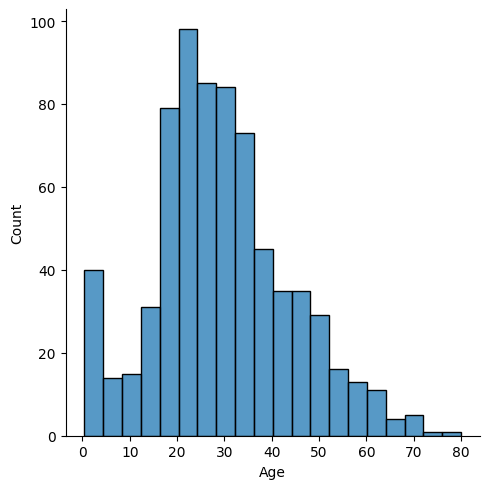

In [27]:
# distribution of column 'Age'
sns.displot(train_df['Age']) 

# mean is around 23-25

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


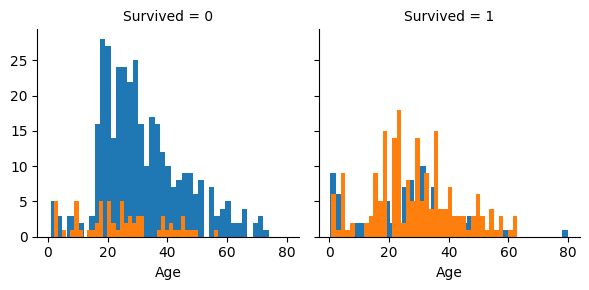

In [28]:
g = sns.FacetGrid(train_df, col='Survived', hue='Sex') # create two grids - survived = o or survived = 1
g.map(plt.hist, 'Age', bins=40)

# The majority of survived = 0 are men around age 20-30 years old.

# Most survivors are women around age 20-30 

## sex

<Axes: xlabel='Sex', ylabel='Survived'>

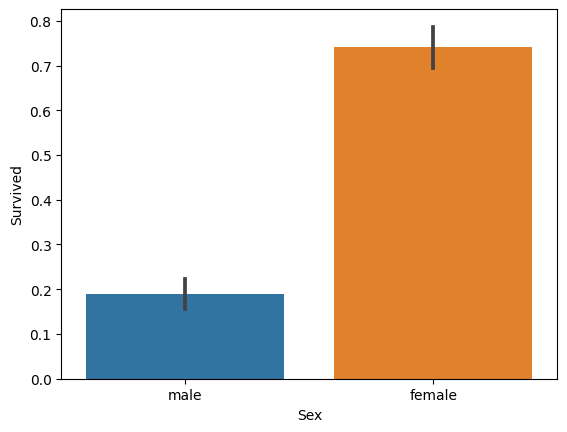

In [29]:
# barplot of survival rate among male and female passengers

sns.barplot(data=train_df, y='Survived', x="Sex")

## Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

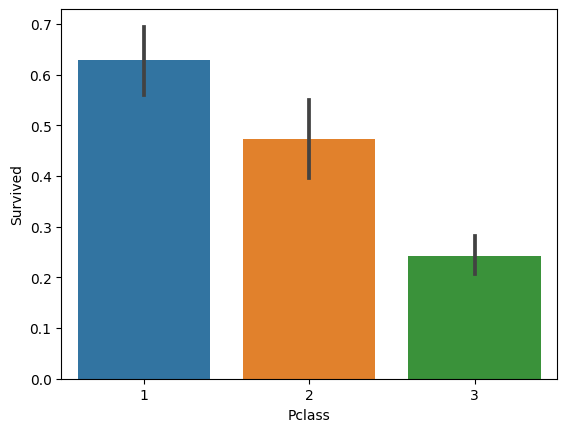

In [30]:
sns.barplot(data=train_df, y='Survived', x="Pclass")

## SibSp

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


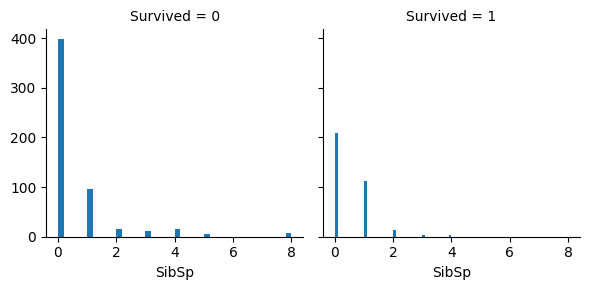

In [31]:
g = sns.FacetGrid(train_df, col='Survived') # create two grids - survived = o or survived = 1
g.map(plt.hist, 'SibSp', bins=40)

In [32]:
train_df[train_df['Survived'] == 0].groupby('SibSp')['Survived'].count()

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: Survived, dtype: int64

In [33]:
train_df[train_df['Survived'] == 1].groupby('SibSp')['Survived'].count()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: Survived, dtype: int64

## Pclass

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


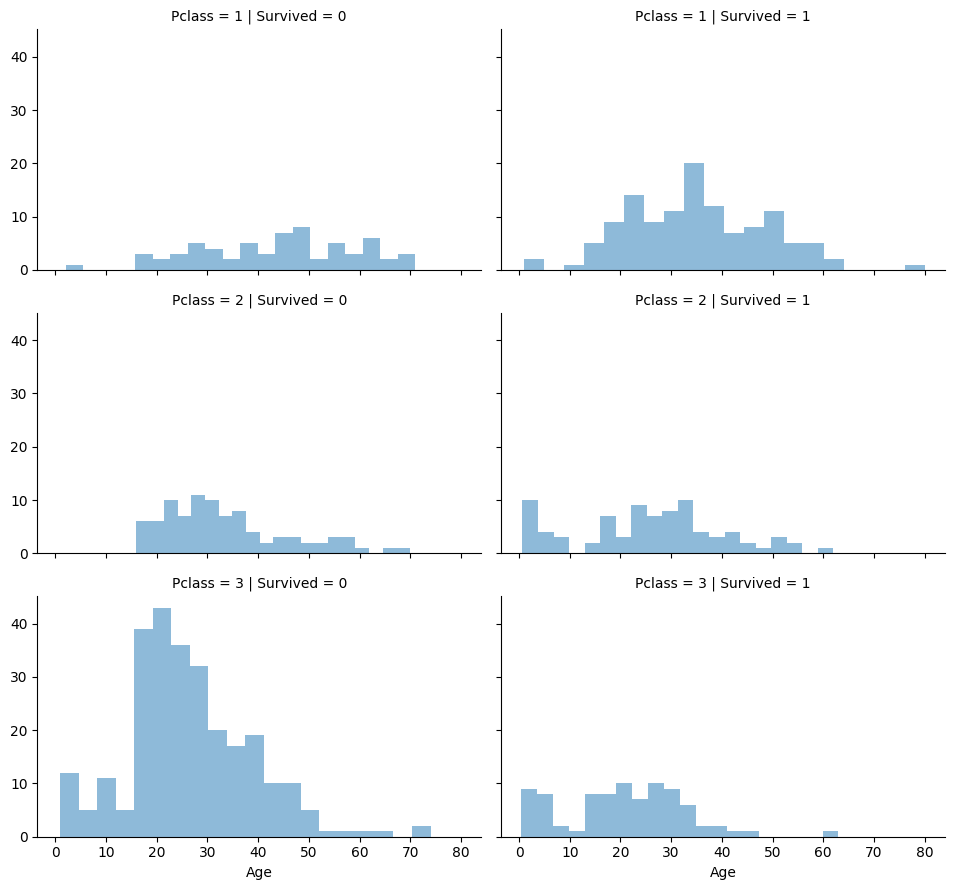

In [34]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Most people from the upper class, Pclass = 1, survived.

## embarked

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


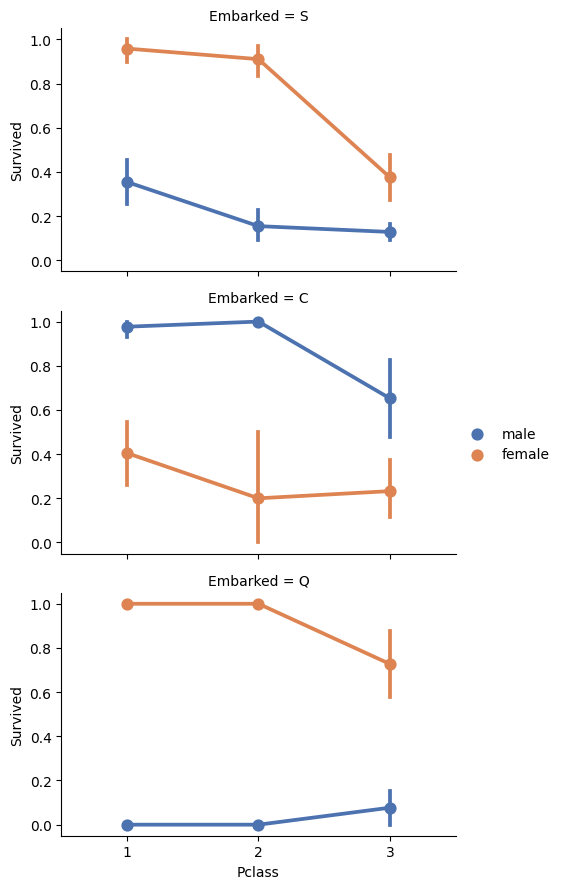

In [35]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Female passengers had the best survival rate
# Except for Embarked = C
# But Pclass = 1 still had the best survival rate

# Data wrangling

The visualization and descriptive analysis led us to some assumpptions about the data.

## dropping features

some features doesn't have any predictive power and it also wouldn't have any logic if these variables had a importance

* Cabin (Cabin number)
* Ticket (Ticket number)
* Name 

In [36]:
print("Before", train_df.shape, test_df.shape)


train_df = train_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
combine = [train_df, test_df]


Before (891, 12) (418, 11)


In [37]:

train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

((891, 10), (418, 9), (891, 10), (418, 9))

# Converting categorical feature

To be able to use e.g. 'Sex' we must transform it into dummies. 

Female = 1, Male = 0

In [38]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


# Data imputation 

* Completing a numerical feature
* Age has 177 NA's

We can consider three methods to complete a numerical continuous feature.

* A simple way is to generate random numbers between mean and standard deviation.

* More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

* Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [39]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

In [40]:
df_corr = train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']] # keep only int and float columns
df_corr1 = pd.DataFrame(df_corr)

print(df_corr1.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex            -0.042939  0.543351 -0.131900 -0.093254  0.114631  0.245489   

                 Fare       Sex  
PassengerId  0.012658 -0.042939  
Survived     0.257307  0.543351  
Pclass      -0.549500 -0.131900  
Age          0.096067 -0.093254  
SibSp        0.159651  0.114631  
Parch        0.216225  0.245489  
Fare         1.000000  0.182333  
Sex          0.182333  1.

c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


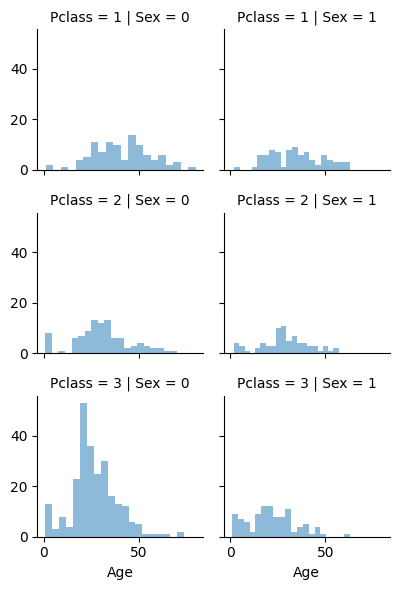

In [41]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1, height=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [42]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2): # iterates over 'Sex' 
        for j in range(0, 3): # Iterates over 'Pclass' 
            guess_df = dataset[(dataset['Sex'] == i) &  
                                  (dataset['Pclass'] == j+1)]['Age'].dropna() # 
                                   # Within this nested loop, it filters the current dataset to select rows where 'Sex' equals i and 'Pclass' equals j+1
                                   #  then it extracts the 'Age' values from these filtered rows and drops any rows where 'Age' is missing (NaN).

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
            # Calculates an age guess for the selected group by finding the median of the non-missing ages in that group. This is assigned to age_guess.

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
            # After completing the nested loops for all combinations of 'Sex' and 'Pclass', it enters another set of nested loops with the same range. 
            # In these loops, it checks for rows in the dataset where the 'Age' is missing (dataset.Age.isnull()) and the 'Sex' matches i and the 'Pclass' matches j+1.
            # For rows that meet these conditions, it assigns the corresponding age guess from the guess_ages array to fill in the missing age value.

    dataset['Age'] = dataset['Age'].astype(int)
    # Finally, it converts the 'Age' column in the dataset to integer type.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S


## Create age bands

In [44]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


* train_df['AgeBand'] = pd.cut(train_df['Age'], 5): This code creates a new column in the train_df DataFrame called 'AgeBand'.
    * It uses the pd.cut() function from the Pandas library to bin or categorize the 'Age' column into five equal-width age bands or categories.
    * The 'Age' column values are divided into five bins based on the range of ages present in the dataset.

* train_df[['AgeBand', 'Survived']]: This code selects two columns from the DataFrame: 'AgeBand' and 'Survived'.

* .groupby(['AgeBand'], as_index=False): This code groups the selected DataFrame by the 'AgeBand' column.

* .mean(): After grouping, the code calculates the mean (average) value for each group. Since 'Survived' contains binary values (0 or 1 for not survived and survived), this gives the proportion of survivors in each age band.

Replacing Age with ordinals based on these bands.

In [45]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [46]:
# remove AgeBand feature
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S


In [50]:
train_df['Age'].unique()

array([1, 2, 3, 0, 4])

# Considerations for variables

* Pclass
* Age
* Sex 

Thus, these variables helps us to understand and predict survival rate and should be included in the final model

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook